<a href="https://colab.research.google.com/github/quicksilverri/statistics/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистика

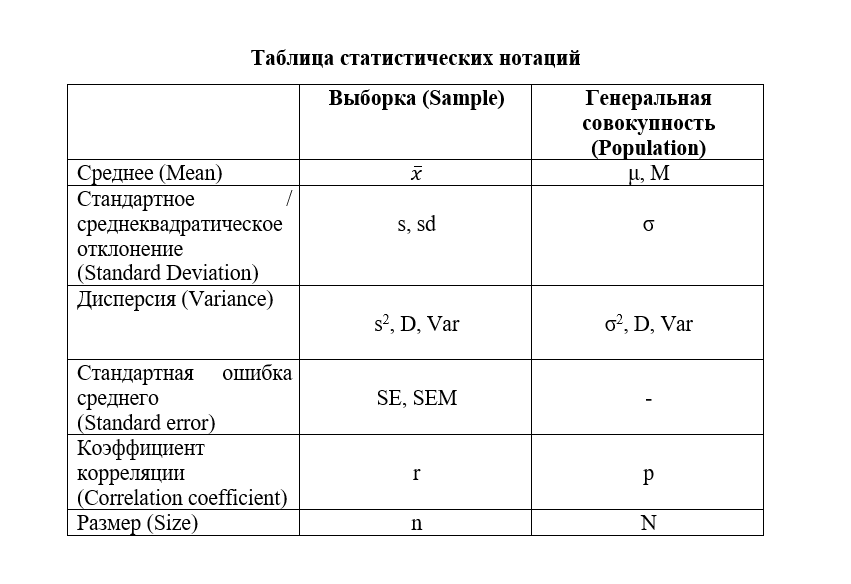

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Генеральная совокупность и выборка 

**Генеральная совокупность (population)** - это множество, на которое мы обобщаем наше исследование. Чаще всего исследовать всю генеральную совокупность нельзя, поэтому используется *выборка*.  

**Выборка (sample)** - это часть генеральной совокупности.  

* *Простая случайная выборка (simple random sample)* - из всей генеральной совокупности выбираются случайные элементы. 
* *Стратифицированная выборка (stratified sample)* - генеральная выборка делится на части по какому-либо признаку и внутри страт происходит случайная выборка элементов. 
* *Групповая выборка (cluster sample)* - генеральная выборка делится на +- равноценные части, для исследования выбираются какие-то кластеры и уже внутри этих кластеров происходит случайная выборка элементов. 

N - size of a population.  
n - size of a sample.

## Типы переменных 

**Переменные (variables)** - различные характеристики, которые мы собственно исследуем. 

**NB! Population has parameters, sample has statistics.**  



Виды переменных: 

**Количественные (quantitative/continuous)**
* Непрерывные (ratio/interval) - любое значение из промежутка
* Дискретные (discrete) - только определенные значения

**Номинативные (qualitative/categorical)** 
* Ранговые (ordinal) - упорядоченные значения
* Номинальные (nominal) = равноправные значения

In [2]:
data = [['Kate', 14, 1, 'first'], 
        ['Mary', 16, 0, 'second'], 
        ['Loius', 19, 2, 'third']]
header = ['name', 'age', 'n of siblings', 'place in a race']
df = pd.DataFrame(data, columns=header)

df  

,name,age,n of siblings,place in a race
0,Kate,14,1,first
1,Mary,16,0,second
2,Loius,19,2,third


name - nominal   
age - interval  
n of siblings - discrete   
place in a race - ordinal  

## Центральная тенденция (Central Tendency) 

In [4]:
med_link = 'https://raw.githubusercontent.com/quicksilverri/medical_data_visualization/main/medical_examination.csv?token=GHSAT0AAAAAABUQTHITKW5RCT5PAPLFZPF4YVBGVYQ'
med = pd.read_csv(med_link, index_col=0)

med.sample(5)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
60082,21095,1,168,62.0,120,80,1,1,0,0,1,1
53976,21879,1,153,60.0,160,100,2,3,0,0,1,1
56104,17317,2,151,45.0,140,80,1,1,1,0,1,1
66756,17580,2,120,80.0,130,80,1,1,0,0,0,1
55599,18181,1,173,71.0,110,70,2,1,0,0,1,0


In [5]:
sample = med.sample(1000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


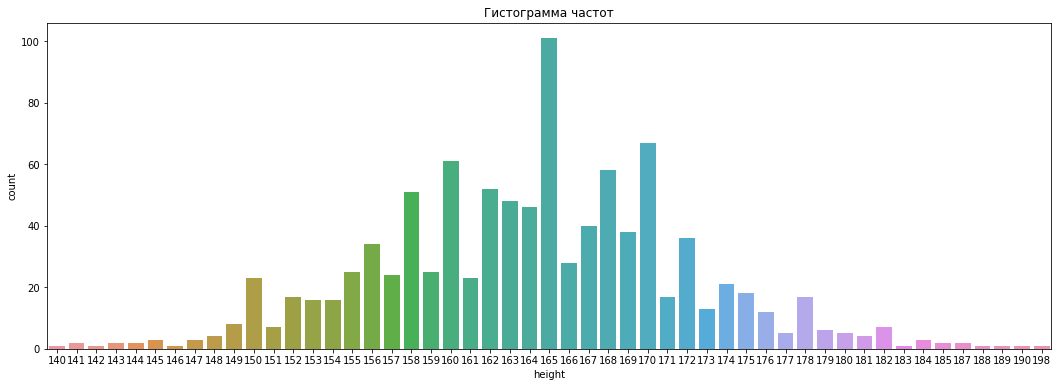

In [ ]:
plt.figure(figsize=(18, 6))
plt.title('Гистограмма частот')
sns.countplot(sample.height)

Вот эта штука - это гистограмма частот. По ней уже можно увидеть всякие интересные закономерности и примерно прикинуть, где "среднее" значение.

**Виды среднего:**


In [ ]:
sample.height.mean()

164.122

In [ ]:
sample.height.median()

165.0

In [ ]:
sample.height.mode()

0    165
dtype: int64

## Изменчивость (deviation) 


Самая простая, но при этом и подверженая влиянию выбросов мера - **размах (range)**

In [7]:
range = sample.height.max() - sample.height.min()
range

63

**Дисперсия (variance)** - средний квадрат отклонений индивидуальных значений признака от их средней величины.  
Дисперсия не очень отражает то, насколько реально значения отличаются, к тому же имеет другую размерность. 

**Среднее квадратическое отклонение (standart deviation)** - корень из дисперсии.  

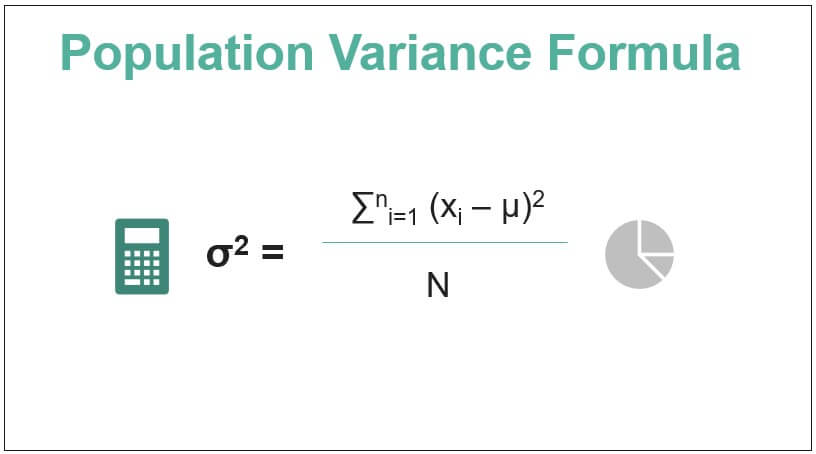

sample_variance.svg

Для выборки в знаменателе -1 (why? idk, practically it turned out to be a better representation for the population as a whole)

In [7]:
sample.height.var()

64.66105705705705

In [8]:
sample.height.std()

8.041209924946434

In [9]:
sample.height.var() ** 0.5

8.041209924946434

**Межквартальный размах (interquartile range)** - это разница между 0.75 и 0.25 перцентилем.

In [11]:
iqr = sample.height.quantile(0.75) - sample.height.quantile(0.25)
iqr

11.0

Легко заметить, что медиана - это 0.5 перцентиль.

In [13]:
sample.height.median() == sample.height.quantile(0.5)

True

Для датасетов без выбросов можно использовать среднее арифметическое + стандартное отклонение.  
Если в датасете есть выбросы, то лучше использовать медиану и iqr - они менее подвержены влиянию супербольших и супермаленьких значений. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


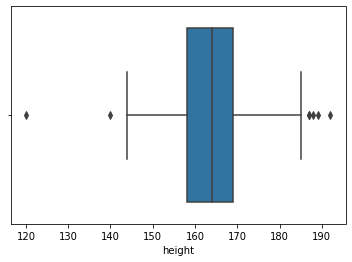

In [12]:
sns.boxplot(sample.height)